In [1]:
# X
# dependencies
import os
import pandas as pd
import pymongo
import requests
import sys

from bs4 import BeautifulSoup
from IPython.display import Image
from sys import platform
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
# X
# import Splinter and set the chromedriver path
from splinter import Browser
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# This has run successfully when you see "Driver has been saved in cache" in pink below
# and a new browser window opens with nothing in it.

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389


[WDM] - Driver [/Users/pbernhardt/.wdm/drivers/chromedriver/mac64/89.0.4389.23/chromedriver] found in cache


# Step One: the scraping

In [3]:
# X
# scraping NASA Mars News
# collect the latest News Title and Paragraph Text from redplanetscience.com...
url = "https://redplanetscience.com"
browser.visit(url)
# print(url)

In [4]:
# Retrieve page with the requests module
response = browser.html
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(response, 'html.parser')
soup

<html><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link crossorigin="anonymous" href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet" type="text/css"/>
<link href="css/app.css" rel="stylesheet" type="text/css"/>
<link crossorigin="anonymous" href="https://pro.fontawesome.com/releases/v5.10.0/css/all.css" integrity="sha384-AYmEC3Yw5cVb3ZcuHtOA93w35dYTsvhLPVnYs9eStHfGJvOvKxVfELGroGkvsg+p" rel="stylesheet"/>
<title>News - Mars Exploration Program</title>
</head>
<body>
<div class="col-md-12">
<div class="row">
<nav class="navbar navbar-expand-lg navbar-light fixed-top">
<div class="container-fluid">
<a class="navbar-brand" href="#">
<img src="image/nasa.png" width="80"/><span class="logo">MARS Planet Science</span>
<span class="logo1">Exploration Program</spa

In [6]:
#0 From inspecting the HTML, it should be "list_text" --> "list_date" --> "content_title"
# although that doesn't appear in soup above
news_title = soup.find("div", class_ = "content_title").get_text()
news_title

'Naming a NASA Mars Rover Can Change Your Life'

In [7]:
#0 <div class="article_teaser_body">...</div>
# And div.article_teaser_body should be the paragraph text from the latest news title.
news_graf_results = soup.find("div", class_="article_teaser_body").get_text()
news_graf = news_graf_results
news_graf

'Want to name the robotic scientist NASA is sending to Mars in 2020? The student who named Curiosity — the rover currently exploring Mars — will tell you this is an opportunity worth taking.'

In [8]:
# X
# scraping JPL Mars Space Images - Featured Image
# visit spaceimages-mars.com...
url = "https://spaceimages-mars.com/"
browser.visit(url)
# print(url)

# Retrieve page with the requests module
response = browser.html
# Create BeautifulSoup object; parse with 'html.parser'
soup = BeautifulSoup(response, 'html.parser')
soup

<html class=""><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" rel="stylesheet"/>
<!-- <link rel="stylesheet" type="text/css" href="css/font.css"> -->
<link href="css/app.css" rel="stylesheet" type="text/css"/>
<link href="https://stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
<title>Space Image</title>
<style type="text/css">.fancybox-margin{margin-right:15px;}</style></head>
<body>
<div class="header">
<nav class="navbar navbar-expand-lg">
<a class="navbar-brand" href="#"><img id="logo" src="image/nasa.png"/><span class="logo">Jet Propulsion Laboratory</span>
<span class="logo1">California Institute of Technology</span></a>
<button aria-controls="navbarNav" aria-expanded="false" aria-label="Toggle navigation" class="navbar-toggler" data-target="#navbarNav" data-toggle="collapse" type="button

In [ ]:
# 1/2
# ...and find the URL of the current Featured Mars Image 
# and assign the url string to a variable called featured_image_url.
# Find the URL of the *full size* .jpg image.
# Save a complete url string for this image, e.g.
# featured_image_url = "https://spaceimages-mars.com/image/featured/mars2.jpg"


In [ ]:
# The Full Image button on the homepage links to this 
# <a target="_blank" class="showimg fancybox-thumbs" href="image/featured/mars2.jpg">

In [25]:
featured_image_relative_url = soup.find("a", class_="showimg fancybox-thumbs")
# featured_image_relative_url = soup.find("img", class_="headerimage fade-in").get_text()
# featured_image_relative_url = soup.find("div", class_="headerimage fade-in").get_text()
featured_image_relative_url = featured_image_relative_url.get("href")
featured_image_relative_url

'image/featured/mars3.jpg'

In [26]:
featured_image_url = f"{url}{featured_image_relative_url}"
print(featured_image_url)

https://spaceimages-mars.com/image/featured/mars3.jpg


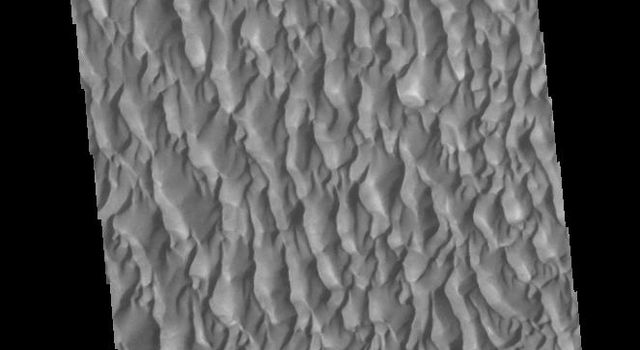

In [27]:
Image(featured_image_url)

In [28]:
#0
xpath = '//td//a[@class="list_image"]/img'

# Use splinter to Click the "Mars in natural color in 2007" image 
# to bring up the full resolution image
results = browser.find_by_xpath(xpath)
img = results[0]
img.click()

# Scrape the browser into soup and use soup to find the full resolution image of mars
# Save the image url to a variable called `img_url`
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
img_url = soup.find("img", class_="jpg")["src"]
img_url
Image(url='img.png')

ElementDoesNotExist: no elements could be found with xpath "//td//a[@class="list_image"]/img"

In [ ]:
# X
# scraping Mars Facts
# visit galaxyfacts-mars.com
url = "https://galaxyfacts-mars.com"
browser.visit(url)
print(url)

In [ ]:
# X
# and use Pandas to scrape the table containing facts about the planet including:
# diameter, mass, usw.

# <table class="table table-striped"> seems to be this table.
HTML_tables = pd.read_html(url)
# HTML_tables
# type(HTML_tables)
df_from_html_table = HTML_tables[0]
df_from_html_table

In [ ]:
# X
# Use Pandas to convert the data to a HTML table string.
# Something about scraping the Wikipedia entry for state capitols.
# url = 'https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States'
html_from_df = df_from_html_table.to_html()
df_from_html_table.to_html("table.html")
print(html_from_df)

In [ ]:
# X
# If you're running macOS, this opens the table in its own browser window
if platform == "darwin":
    !open table.html
else:
    print(f"{os.getcwd()}/table.html")

In [ ]:
# X
# scraping Mars Hemispheres
# Visit marshemispheres.com...
url = "https://marshemispheres.com"
browser.visit(url)
print(url)

In [ ]:
# X
# ...to obtain high resolution images for each of Mars's hemispheres.
# Click each of the links to the hemispheres to find the URL of the full resolution image.
# Save both the image url string for the full resolution hemisphere image,
# and the Hemisphere title containing the hemisphere name.
# Use a Python dictionary to store the data using the keys img_url and title.
# Append the dictionary with the image url string and the hemisphere title to a list.
# This list will contain one dictionary for each hemisphere.

hemisphere_image_urls = [
    {"title": "Cerberus Hemisphere", "img_url": "https://marshemispheres.com/images/cerberus_enhanced.tif", "extent":"This image of the Cerberus Hemisphere of Mars is centered at 3&#0176; lat, 185&#0176; long."},
    {"title": "Schiaparelli Hemisphere", "img_url": "https://marshemispheres.com/images/schiaparelli_enhanced.tif", "extent":"This image of the Schiaparelli Hemisphere of Mars extends from -60&#0176; to 60&#0176; lat and from 260&#0176; to 30&#0176; long."},
    {"title": "Syrtis Major Hemisphere", "img_url": "https://marshemispheres.com/images/syrtis_major_enhanced.tif", "extent":"This image of the Syrtis Major Hemisphere of Mars extends from -60&#0176; to 60&#0176; lat and from 260&#0176; to 350&#0176; long."},
    {"title": "Valles Marineris Hemisphere", "img_url": "https://marshemispheres.com/images/valles_marineris_enhanced.tif", "extent":"This image of the Valles Marineris Hemisphere of Mars is centered at -8&#0176; lat, 78&#0176; long."}
]
hemisphere_image_urls

In [ ]:
# X
# close the session
browser.quit()

# Step 2: MongoDB and Flask

In [ ]:
# Use MongoDB with Flask templating to create a new HTML page
# that displays all of the information that was scraped from the URLs above.

# 1 Start by converting your Jupyter notebook into a Python script called scrape_mars.py
# with a function called scrape that will execute all of your scraping code from above
# and return one Python dictionary containing all of the scraped data.

In [ ]:
# 2 Next, create a route called /scrape that will import your scrape_mars.py script and
# call your scrape function.

In [ ]:
# 3 Store the return value in Mongo as a Python dictionary.

In [ ]:
# 4 Create a root route / that will query your Mongo database and
# pass the Mars data into an HTML template to display the data.

In [ ]:
# 5 Create a template HTML file called index.html that will take the mars data dictionary and
# display all of the data in the appropriate HTML elements.
# Use the following as a guide for what the final product should look like,
# but feel free to create your own design:
print("https://umn.bootcampcontent.com/University-of-Minnesota-Boot-Camp/uofm-stp-data-pt-12-2020-u-c/tree/master/02-Homework/12-Web-Scraping-and-Document-Databases/Instructions"
)

# Step 3: Submit

In [ ]:
# Upload the Jupyter Notebook containing the scraping code and
# screenshots of your final application
# to your GitHub repository and submit the link.
# Ensure your repository has regular commits (i.e. 20+ commits) and
# a thorough README.md file.

# Hints

In [ ]:
# Use Splinter to navigate the sites when needed and
# BeautifulSoup to help find and parse out the necessary data.

# Use Pymongo for CRUD applications for your database.
# For this homework, you can simply overwrite the existing document each time
# the /scrape url is visited and new data is obtained.

# Use Bootstrap to structure your HTML template.